In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from glob import glob

In [3]:
import sys
sys.path.append('../../baseline_code')

In [4]:
from metrics_test import evaluate, macro_averaged_auprc, micro_averaged_auprc

In [5]:
data_augs_list = ['no_data_aug', 'mixup', 'only_grid_distort',
                  'only_random_erase', 'only_random_rotate',
                  'only_random_scale', 'only_random_shift']

In [6]:
ans = []
for data_aug in data_augs_list:
    for i in range(1, 4):
        
        this_ans = [data_aug, i]
        
        df_dict = evaluate(
            './results/{}_run{}_model.csv'.format(data_aug, i),
            '../../data/annotations_v030.csv',
            '../../data/dcase-ust-taxonomy.yaml',
            'coarse')
        micro_auprc, eval_df = micro_averaged_auprc(df_dict, return_df=True)
        macro_auprc, class_auprc = macro_averaged_auprc(df_dict, return_classwise=True)
        thresh_0pt5_idx = (eval_df['threshold'] >= 0.5).nonzero()[0][0]
        
        this_ans.append(micro_auprc)
        this_ans.append(macro_auprc)
        this_ans.append(eval_df['F'][thresh_0pt5_idx])
        this_ans += [class_auprc[x] for x in range(1, 9)]
        
        df_dict = evaluate(
            './results/{}_run{}_model.csv'.format(data_aug, i),
            '../../data/annotations_v030.csv',
            '../../data/dcase-ust-taxonomy.yaml',
            'fine')
        micro_auprc, eval_df = micro_averaged_auprc(df_dict, return_df=True)
        macro_auprc, class_auprc = macro_averaged_auprc(df_dict, return_classwise=True)
        thresh_0pt5_idx = (eval_df['threshold'] >= 0.5).nonzero()[0][0]
        
        this_ans.append(micro_auprc)
        this_ans.append(macro_auprc)
        this_ans.append(eval_df['F'][thresh_0pt5_idx])
        this_ans += [class_auprc[x] for x in range(1, 9)]
        
        ans.append(this_ans)

/home/sai/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 1-X_engine-of-uncertain-size
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 2-X_other-unknown-impact-machinery
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 4-X_other-unknown-powered-saw
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 5-X_other-unknown-alert-signal
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 6-X_music-from-uncertain-source
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column

In [7]:
df = pd.DataFrame.from_records(ans, columns=[
    'aug', 'run', 'coarse_micro_auprc', 'coarse_macro_auprc', 'coarse_micro_f1',
    'coarse_1', 'coarse_2', 'coarse_3', 'coarse_4', 'coarse_5', 'coarse_6', 'coarse_7', 'coarse_8', 
    'fine_micro_auprc', 'fine_macro_auprc', 'fine_micro_f1',
    'fine_1', 'fine_2', 'fine_3', 'fine_4', 'fine_5', 'fine_6', 'fine_7', 'fine_8'
])

In [9]:
(df
 .loc[:, ['aug', 'fine_micro_auprc']]
 .groupby('aug').describe()
)

fine_micro_auprc                                          \
                              count      mean       std       min       25%   
aug                                                                           
mixup                           3.0  0.728026  0.003398  0.724772  0.726262   
no_data_aug                     3.0  0.685248  0.002567  0.683520  0.683774   
only_grid_distort               3.0  0.710341  0.009768  0.699111  0.707083   
only_random_erase               3.0  0.700591  0.002696  0.697860  0.699262   
only_random_rotate              3.0  0.699151  0.017044  0.679477  0.694005   
only_random_scale               3.0  0.705403  0.003781  0.701163  0.703891   
only_random_shift               3.0  0.701636  0.014613  0.692039  0.693227   

                                                  
                         50%       75%       max  
aug                                               
mixup               0.727752  0.729652  0.731552  
no_data_aug         0.684027  0.686113  0.688198  
only_grid_distort   0.715056  0.715957  0.716857  
only_random_erase   0.700664  0.701957  0.703249  
only_random_rotate  0.708533  0.708988  0.709444  
only_random_scale   0.706620  0.707523  0.708426  
only_random_shift   0.694415  0.706434  0.718454

In [10]:
from plotnine import *

In [26]:
toplot = (df
          .loc[:, ['aug', 'fine_micro_auprc']]
          .groupby('aug').describe()
         )
toplot.columns = toplot.columns.droplevel(0)
toplot = toplot.reset_index()

In [27]:
toplot

,aug,count,mean,std,min,25%,50%,75%,max
0,mixup,3.0,0.728026,0.003398,0.724772,0.726262,0.727752,0.729652,0.731552
1,no_data_aug,3.0,0.685248,0.002567,0.683520,0.683774,0.684027,0.686113,0.688198
2,only_grid_distort,3.0,0.710341,0.009768,0.699111,0.707083,0.715056,0.715957,0.716857
3,only_random_erase,3.0,0.700591,0.002696,0.697860,0.699262,0.700664,0.701957,0.703249
4,only_random_rotate,3.0,0.699151,0.017044,0.679477,0.694005,0.708533,0.708988,0.709444
5,only_random_scale,3.0,0.705403,0.003781,0.701163,0.703891,0.706620,0.707523,0.708426
6,only_random_shift,3.0,0.701636,0.014613,0.692039,0.693227,0.694415,0.706434,0.718454


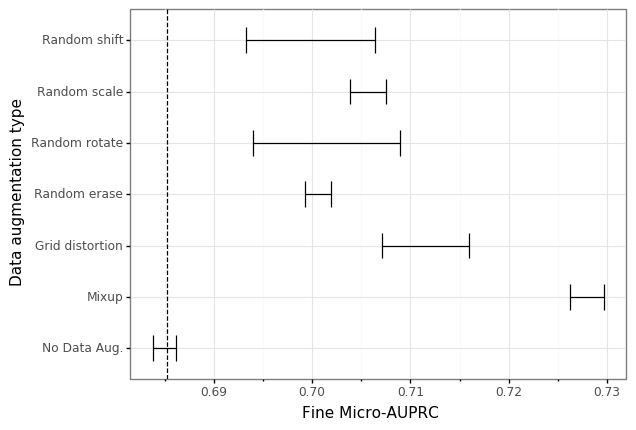

<ggplot: (8746732619693)>

In [45]:
(ggplot(toplot)
 + geom_errorbarh(aes(y='aug', x='mean', xmin='25%', xmax='75%'))
 + geom_vline(xintercept=0.685248, linetype='dashed')
 + theme_bw()
 + xlab('Fine Micro-AUPRC')
 + ylab('Data augmentation type')
 + scale_y_discrete(
     limits=[
         'no_data_aug','mixup','only_grid_distort','only_random_erase',
         'only_random_rotate','only_random_scale','only_random_shift'],
     labels=['No Data Aug.', 'Mixup', 'Grid distortion', 'Random erase',
             'Random rotate', 'Random scale', 'Random shift']
 )
)

In [66]:
toplot = (df.loc[:, ['aug', 'fine_1', 'fine_2', 'fine_3', 'fine_4', 'fine_5', 'fine_6', 'fine_7', 'fine_8']]
 .melt('aug')
 .groupby(['aug', 'variable']).describe()
)

In [68]:
toplot.columns = toplot.columns.droplevel(0)

In [70]:
toplot = toplot.reset_index()

In [83]:
toplot.head()

,aug,variable,count,mean,std,min,25%,50%,75%,max
0,mixup,fine_1,3.0,0.663753,0.005865,0.657007,0.661811,0.666614,0.667127,0.667639
1,mixup,fine_2,3.0,0.661401,0.027412,0.637732,0.646383,0.655034,0.673235,0.691436
2,mixup,fine_3,3.0,0.334421,0.028277,0.305535,0.320609,0.335684,0.348865,0.362045
3,mixup,fine_4,3.0,0.452245,0.071946,0.399374,0.411280,0.423186,0.478681,0.534176
4,mixup,fine_5,3.0,0.840295,0.019076,0.819239,0.832231,0.845223,0.850824,0.856425


In [87]:
toplot.variable = toplot.variable.replace({
    'fine_1': 'Engine',
    'fine_2': 'Machinery impact',
    'fine_3': 'Non-machinery impact',
    'fine_4': 'Powered saw',
    'fine_5': 'Alert signal',
    'fine_6': 'Music',
    'fine_7': 'Human voice',
    'fine_8': 'Dog'
})

In [94]:
toplot.to_csv('toplot1.csv', index=False)

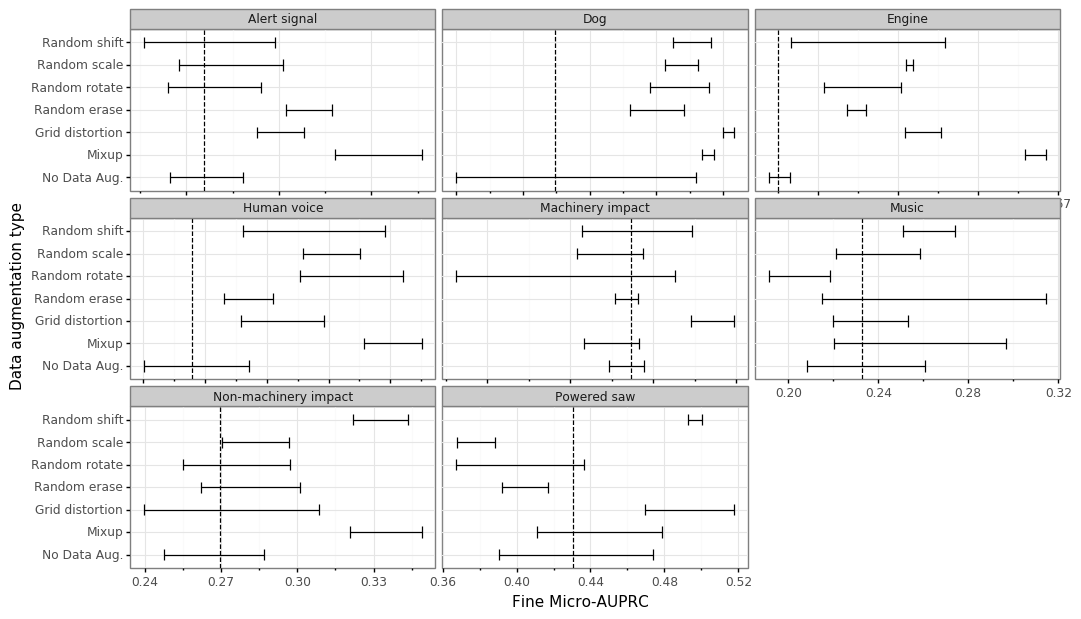

<ggplot: (8746724902641)>

In [92]:
(ggplot(toplot)
 + geom_errorbarh(aes(y='aug', x='mean', xmin='25%', xmax='75%'))
 + geom_vline(aes(xintercept='mean'), data=toplot.loc[lambda x: x.aug == 'no_data_aug'], linetype='dashed')
 + theme_bw()
 + xlab('Fine Micro-AUPRC')
 + ylab('Data augmentation type')
 + scale_y_discrete(
     limits=[
         'no_data_aug','mixup','only_grid_distort','only_random_erase',
         'only_random_rotate','only_random_scale','only_random_shift'],
     labels=['No Data Aug.', 'Mixup', 'Grid distortion', 'Random erase',
             'Random rotate', 'Random scale', 'Random shift']
 )
 + facet_wrap("~ variable", scales='free_x')
 + theme(figure_size=(12, 7))
)